In [1]:
from sklearn.datasets import fetch_openml

# Fetching the dataset
ames_data = fetch_openml(name="house_prices", as_frame=True)
data = ames_data.frame

df = data.drop(columns=['Alley','MiscFeature','Fence','PoolQC','FireplaceQu','Alley','LotFrontage'])
# # print(df.isnull().sum()[df.isnull().sum() > 0].to_string())
# print(df['MasVnrType'])

### Strategies for Handling Missing Data:
#### For categorical columns (like Education_Level, Location, Home_Ownership):
Mode Imputation: Replace missing values with the most frequent value (mode).
Custom value: If missing values have a specific meaning (e.g., no education), you can replace them with a custom value like "Unknown".
#### For numerical columns (like Salary, Debt_to_Income_Ratio, Credit_Score):
Mean/Median Imputation: Replace missing values with the mean or median of the column. Median imputation is preferred when there are potential outliers.
Regression Imputation: You can predict the missing value using a regression model based on other available features.

In [2]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
# print(df['MasVnrType'].isnull().sum())
print(df.isnull().sum()[df.isnull().sum() > 0].to_string())

Series([], )


### Using the sklearn library

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
linear_model = LinearRegression()

now to convert non numeric values to the numeric values we will use labelENcoding or one hot encoding by using 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['YourColumn'] = label_encoder.fit_transform(df['YourColumn'])

In [4]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df['MasVnrType'] = label_encoder.fit_transform(df['MasVnrType'])
# df['BsmtQual'] = label_encoder.fit_transform(df['BsmtQual'])
# df['BsmtCond'] = label_encoder.fit_transform(df['BsmtCond'])
# df['BsmtExposure'] = label_encoder.fit_transform(df['BsmtExposure'])
# df['BsmtFinType1'] = label_encoder.fit_transform(df['BsmtFinType1'])
# df['BsmtFinType2'] = label_encoder.fit_transform(df['BsmtFinType2'])
# df['Electrical'] = label_encoder.fit_transform(df['Electrical'])
# df['GarageType'] = label_encoder.fit_transform(df['GarageType'])
# df['GarageFinish'] = label_encoder.fit_transform(df['GarageFinish'])
# df['GarageQual'] = label_encoder.fit_transform(df['GarageQual'])
# df['GarageCond'] = label_encoder.fit_transform(df['GarageCond'])

df = pd.get_dummies(df, drop_first=True).astype(int)
df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,119,790,163,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,0,275,0,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,0,49,1029,...,0,0,0,0,1,0,0,0,1,0


In [5]:
# x_train = df.select_dtypes(include=[int, float])
x_train = df.drop(columns=['SalePrice'])
y = df['SalePrice']
x = x_train.select_dtypes(include=[int, float])

x = np.array(x)
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

print(x_train.shape)
print(y_train.shape)

(1314, 232)
(1314,)


In [6]:
import copy, math
def costFn(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f = np.dot(w,x[i]) + b
        cost = cost + (f-y[i])**2
    cost = cost/(2*m)
    return cost

In [7]:
def gradientFn(x,y,w,b):
    m,n = x.shape
    djw = np.zeros((n,))
    djb = 0.0
    for i in range(m):
        f = (np.dot(w,x[i]) + b) - y[i]
        for j in range(n):
            djw[j] = djw[j] + f*x[i,j]
        djb = djb + f
    djw = djw/m
    djb = djb/m
    return djw,djb

In [43]:
def gradientDecent(x,y,w_in,b_in,alpha,iters):
    w = copy.deepcopy(w_in) #avoid modifying global w within function
    b = b_in
    for i in range(iters):
        djw,djb = gradientFn(x,y,w,b)
        w = w - alpha*djw
        b = b - alpha*djb
        # if i % 100 == 0 and i > 0:
        #     alpha *= 0.9
        if i % math.ceil(iters / 10) == 0:
            cost = costFn(x, y, w, b)
            print(f"Iteration {i:4d}: Cost {cost:.4f}")
    return w,b
initial_w = np.zeros_like(x_train[0])
print(initial_w.shape)
initial_b = 0.
iterations = 1000
alpha = 1.0e-9
w,b = gradientDecent(x_train,y_train,initial_w,initial_b,alpha,iterations)
print(w,b)

(232,)
Iteration    0: Cost 14614026124.9853
Iteration  100: Cost 2885776466.0939
Iteration  200: Cost 2112848969.4685
Iteration  300: Cost 1952763819.7513
Iteration  400: Cost 1880789339.1702
Iteration  500: Cost 1824452537.7874
Iteration  600: Cost 1773530214.6692
Iteration  700: Cost 1726382661.8678
Iteration  800: Cost 1682567937.0904
Iteration  900: Cost 1641824397.5095
[ 2.57367519e+00  1.61146777e-01  9.47328362e-01  9.31233615e-02
  2.42058845e-02  1.08153149e+01  1.05379431e+01  4.61409147e+00
  9.34167420e+00 -2.18671021e-01  7.46172063e+00  1.65847238e+01
  1.51062395e+01  8.83480175e+00 -7.25339383e-02  2.38685073e+01
  7.46543291e-03 -4.95653520e-04  2.39234754e-02  1.00297436e-02
  1.70968892e-02  2.70468136e-03  7.03204486e-02  1.64549061e-02
  1.05644003e+01  3.48195394e-02  9.16669512e+00  2.50369802e+00
  1.28195124e+00 -4.94017011e-01  1.01135060e-01  4.48049278e-01
  1.26103454e-01 -7.12788250e-01  4.11801275e-02  9.99056788e+00
  2.05958051e-03 -3.83918370e-04  7.9

In [44]:
def predict(x,y,w,b):
    n = x.shape[0]
    ys = np.zeros((n,))
    for i in range(n):
        ys[i] = np.dot(w,x[i]) + b
    return ys

In [45]:
y_pred = predict(x_test,y_test,w,b)
print(y_pred)
print(y_test)
r2_test = r2_score(y_test, y_pred)
print(r2_test)

[164628.07835776 239183.07359458 158929.012482   177811.19122115
 212313.32562596 122702.38315451 194396.16077594 166610.54484946
 122688.8595791  174171.79985907 165846.47684186 153547.18088715
 169801.86582661 197106.46405129 182379.44977348 161226.75522473
 178332.27801383 164673.11494686 158941.89518075 195036.35316366
 195438.3474131  175498.11773146 170235.26095563 151823.51654548
 190304.3906216  172554.73829333 182028.22824445 159544.85230943
 180092.65756671 181293.99820768 154644.9504278  204566.81986596
 245470.6626942  153742.10999548 211081.7861649  171092.24055767
 191269.97097872 185759.0697058  232957.31756345 132455.58935461
 153359.28778138 198044.73855897 156158.2854322  240679.22309358
 163164.78371345 199471.1476748  149357.35946341 155426.55398394
 239276.64601323 177490.96531058 154803.85898505 204357.38178451
 143266.1996379  256257.07665057 150005.82146372 213642.06140119
 182928.2162339  177429.11788122 167178.3138652  127177.33916133
 122859.57437366 168978.8

In [81]:
linear_model.fit(x_train, y_train)

# y_pred_train = linear_model.predict(x_train)
y_pred_test = linear_model.predict(x_test)
# print(y_pred_test)
# print(y_test)

[ 1.15497434e+00  2.82866262e+00  7.41339063e-01  7.09540058e+03
  5.14174046e+03  2.90184910e+02  9.94336722e+01  1.48751107e+01
  1.69082923e+01  3.37923453e+00 -2.83295505e-01  2.00043615e+01
  1.18064161e+01  2.78216753e+01 -6.10274174e+00  3.35254045e+01
  9.77745976e+02 -3.22935193e+03  4.38249009e+03  2.03317276e+03
 -2.73313857e+03 -1.16041090e+04  1.12565972e+03  2.76906933e+03
  1.63306977e+01  1.84592418e+01  2.64061730e+01  1.80295772e+01
  2.14038241e+00 -1.97501922e+00  3.74477815e+01  3.17129528e+01
  8.18797013e+01  9.63602812e-02 -2.76097019e+02 -2.45992156e+02
  4.06689708e+04  3.07963170e+04  3.24970225e+04  3.10243376e+04
  3.28974612e+04  4.21788081e+03  6.76865173e+03  2.19798146e+03
  8.94859900e+03 -9.88403272e+03  5.05047119e+03 -2.31352721e+04
  9.53274069e+03 -5.73463533e+03 -2.52867447e+04 -1.10270349e+03
  9.60106939e+03 -4.40075818e+04 -7.57700326e+03 -4.43189060e+03
 -6.93345827e+03 -1.29164481e+04 -1.33977220e+04  7.44716044e+03
 -2.19159846e+04 -1.45051

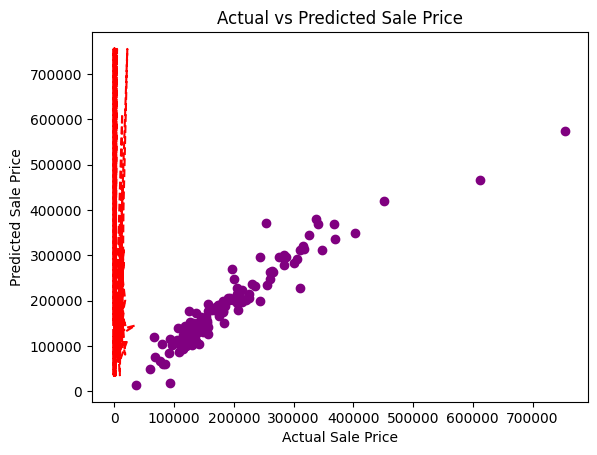

In [82]:
b = linear_model.intercept_
w = linear_model.coef_
train_score = linear_model.score(x_train, y_train)
text_score = linear_model.score(x_test, y_test)
# test_score = r2_score(x_test_scaled, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(text_score)
print(train_score)
print(mse_test)

# for i, col in enumerate(df.columns):
#     plt.figure(i)
#     plt.scatter(x[col], y, color="blue")
#     plt.xlabel(col)
#     plt.ylabel("Target")
#     plt.title(f"{col} vs Target")
#     plt.show()
plt.scatter(y_test, y_pred_test, color='purple')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.plot(x_test,y_test, 'r--')  # Reference line
plt.show()

In [67]:
import copy
import numpy as np
import math

# Cost function
def costFn(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f = np.dot(w, x[i]) + b
        cost += (f - y[i]) ** 2
    cost = cost / (2 * m)  # Fix the division for the correct cost calculation
    return cost

# Gradient function
def gradientFn(x, y, w, b):
    m, n = x.shape
    djw = np.zeros((n,))
    djb = 0.0
    for i in range(m):
        f = (np.dot(w, x[i]) + b) - y[i]
        for j in range(n):
            djw[j] += f * x[i, j]
        djb += f
    djw /= m
    djb /= m
    return djw, djb

# Gradient descent function
def gradientDecent(x, y, w_in, b_in, alpha, iters):
    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in
    for i in range(iters):
        djw, djb = gradientFn(x, y, w, b)
        w = w- alpha * djw
        b -= alpha * djb
        if i % math.ceil(iters / 10) == 0:
            cost = costFn(x, y, w, b)
            print(f"Iteration {i:4d}: Cost {cost:.4f}")
    return w, b

# Initial parameters
initial_w = np.zeros_like(x_train[0])  # Shape matches the number of features
initial_b = 0.
iterations = 100
alpha = 5.0e-10

# Run gradient descent
w, b = gradientDecent(x_train, y_train, initial_w, initial_b, alpha, iterations)
print("Final weights:", w)
print("Final bias:", b)


Iteration    0: Cost 16816633852.6091
Iteration   10: Cost 8296768986.0864
Iteration   20: Cost 7118162794.0421
Iteration   30: Cost 6595379459.9919
Iteration   40: Cost 6166944999.2744
Iteration   50: Cost 5782314830.3867
Iteration   60: Cost 5433891272.3746
Iteration   70: Cost 5117975752.3797
Iteration   80: Cost 4831483458.7820
Iteration   90: Cost 4571642256.7203
Final weights: [ 2.33902235e+00  1.89520238e-01  6.26704118e+00  2.29310048e-02
  1.74411583e-02  6.32986704e+00  6.35367052e+00  5.49629216e-01
  1.66202438e+00  6.33029929e-02  2.17599256e+00  3.90131993e+00
  4.10991738e+00  1.53121738e+00  1.31940280e-02  5.65432878e+00
  1.46546429e-03  1.10639574e-04  5.88440166e-03  1.70334112e-03
  9.26874139e-03  3.22881515e-03  2.27850975e-02  2.39277215e-03
  6.34012664e+00  6.98126955e-03  1.84898232e+00  3.75757329e-01
  2.07998048e-01  3.91794433e-02  1.54353756e-02  6.54145898e-02
  1.27645921e-02  3.96768445e-02  2.07334326e-02  6.38869639e+00
  2.84306136e-04  2.07243486e